In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
csv_path = "C:\Work\Quinyx\QuinyxTest\VesselData.csv"
df = pd.read_csv(csv_path)

In [3]:
df

,eta,ata,atd,vesseldwt,vesseltype,discharge1,load1,discharge2,load2,discharge3,...,load4,stevedorenames,hasnohamis,earliesteta,latesteta,traveltype,previousportid,nextportid,isremarkable,vesselid
0,2017-09-19 00:00:00+00,2017-09-19 00:00:00+00,2017-09-22 00:00:00+00,109290.0,5,0,0,0,0,90173,...,0,Stevedore_104,NaN,2017-09-19 00:00:00+00,2017-09-19 00:00:00+00,ARRIVAL,981,731,f,2242
1,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,2017-10-03 00:00:00+00,67170.0,3,0,0,0,0,0,...,0,Stevedore_109,NaN,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,ARRIVAL,19,15,f,5462
2,2017-09-30 00:00:00+00,2017-09-30 00:00:00+00,2017-10-01 00:00:00+00,67737.0,3,0,0,0,0,0,...,0,Stevedore_57,NaN,2017-09-30 00:00:00+00,2017-09-30 00:00:00+00,ARRIVAL,19,19,f,5251
3,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,2017-10-03 00:00:00+00,43600.0,3,0,0,0,0,0,...,0,Stevedore_57,NaN,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,ARRIVAL,15,18,f,5268
4,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,9231.0,3,0,0,0,0,0,...,0,Stevedore_98,NaN,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,ARRIVAL,74,27,f,5504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8203,2017-11-03 00:00:00+00,2017-11-03 00:00:00+00,2017-11-04 00:00:00+00,9587.0,3,0,0,0,0,0,...,0,Stevedore_64,NaN,2017-11-02 00:00:00+00,2017-11-03 00:00:00+00,ARRIVAL,5,19,f,5681
8204,2017-11-04 00:00:00+00,2017-11-04 00:00:00+00,2017-11-06 00:00:00+00,9654.0,3,0,0,0,0,0,...,0,"Stevedore_110,Stevedore_57,Stevedore_99,Steved...",NaN,2017-11-04 00:00:00+00,2017-11-05 00:00:00+00,SHIFT,391,102,f,4843
8205,2017-11-08 00:00:00+00,2017-11-07 00:00:00+00,2017-11-11 00:00:00+00,4726.0,5,0,0,0,0,0,...,3051,"Stevedore_89,Stevedore_79,Stevedore_75,Stevedo...",NaN,2017-11-07 00:00:00+00,2017-11-10 00:00:00+00,SHIFT,1043,19,f,3115
8206,2017-11-10 00:00:00+00,2017-11-10 00:00:00+00,2017-11-10 00:00:00+00,13320.0,3,0,0,0,0,0,...,0,Stevedore_46,NaN,2017-11-10 00:00:00+00,2017-11-10 00:00:00+00,ARRIVAL,54,71,f,4623


In [4]:
df = df.drop(columns=['eta','stevedorenames','hasnohamis','earliesteta','latesteta','previousportid','nextportid','isremarkable'])

In [5]:
df['ata'] = pd.to_datetime(df['ata'])
df.sort_values('ata', inplace=True, ascending=True)

Removed some information in data that is likely not of use and sorted the data by time of arrival. If I have time I will go back and test them by for example mapping strings to values.

In [6]:
ata = df.pop('ata')

In [7]:
atd = pd.to_datetime(df.pop('atd'))

In [8]:
traveltype = df.pop('traveltype')

In [9]:
vesselid = df.pop('vesselid')

In [10]:
vesseltype =df.pop('vesseltype')

In [11]:
vesseldwt = df.pop('vesseldwt')

These may be useful so save in sepearte df e.g. for plotting

In [12]:
ata = pd.to_datetime(ata).dt.date

time aspect not relevant here as it is 0 valued

In [13]:
df

,discharge1,load1,discharge2,load2,discharge3,load3,discharge4,load4
689,0,0,0,0,85539,0,0,0
202,0,0,0,0,0,0,0,0
361,0,0,0,0,0,0,0,0
185,0,0,0,0,0,0,0,0
1725,0,0,0,0,70963,0,0,0
...,...,...,...,...,...,...,...,...
8043,0,0,0,0,0,0,0,0
8000,0,0,0,0,0,0,0,0
7844,0,0,0,0,0,0,0,0
8196,0,0,0,0,0,0,0,0


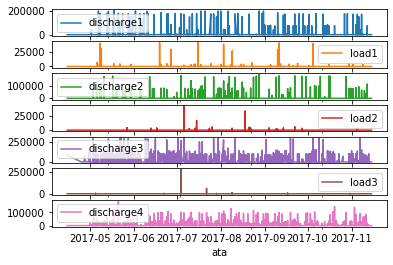

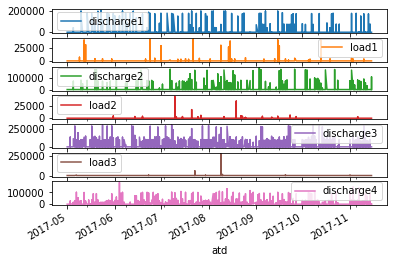

In [14]:
plot_cols = ['discharge1', 'load1', 'discharge2','load2','discharge3','load3','discharge4']
plot_features = df[plot_cols]
plot_features.index = ata
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols]
plot_features.index = atd
_ = plot_features.plot(subplots=True)

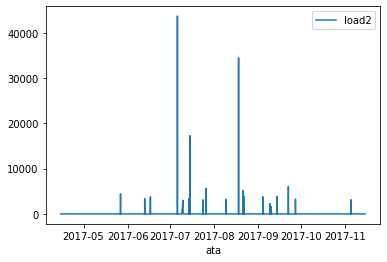

In [15]:
plot_cols = ['load2']
plot_features = df[plot_cols]
plot_features.index = ata
_ = plot_features.plot(subplots=True)

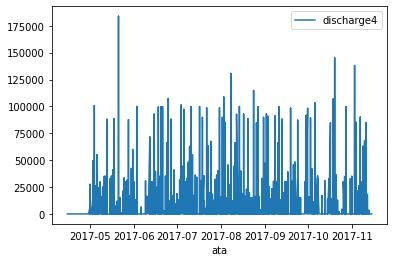

In [16]:
plot_cols = ['discharge4']
plot_features = df[plot_cols]
plot_features.index = ata
_ = plot_features.plot(subplots=True)

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
discharge1,8208.0,1732.712841,16297.994648,0.0,0.0,0.0,0.0,204304.0
load1,8208.0,60.754386,1325.463945,0.0,0.0,0.0,0.0,41761.0
discharge2,8208.0,1168.698221,11331.135301,0.0,0.0,0.0,0.0,189933.0
load2,8208.0,19.387549,665.333248,0.0,0.0,0.0,0.0,43639.0
discharge3,8208.0,4791.331871,25366.035772,0.0,0.0,0.0,0.0,299647.0
load3,8208.0,44.745492,3071.717973,0.0,0.0,0.0,0.0,271251.0
discharge4,8208.0,1820.782407,10034.936858,0.0,0.0,0.0,0.0,183837.0
load4,8208.0,1509.046784,11936.519585,0.0,0.0,0.0,0.0,293449.0


Sparcity of the data worries me.

In [18]:
column_indices = {name: i for i, name in enumerate(df.columns)}
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

split the dataset into a training and test set before normalising. As this is a forcast, the data isnt shuffled.

In [19]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

normalising the data should help forcasting greatly, use mean normalisation as min max doesnt handle outliers well

In [20]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [21]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [22]:
w1 = WindowGenerator(input_width=18, label_width=1, shift=24,
                     label_columns=['discharge4'])

w2 = WindowGenerator(input_width=48, label_width=1, shift=1,
                     label_columns=['discharge4'])

In [23]:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 49, 8)
Inputs shape: (3, 48, 8)
labels shape: (3, 1, 1)


In [24]:
w2.example = example_inputs, example_labels

In [25]:
def plot(self, model=None, plot_col='discharge4', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

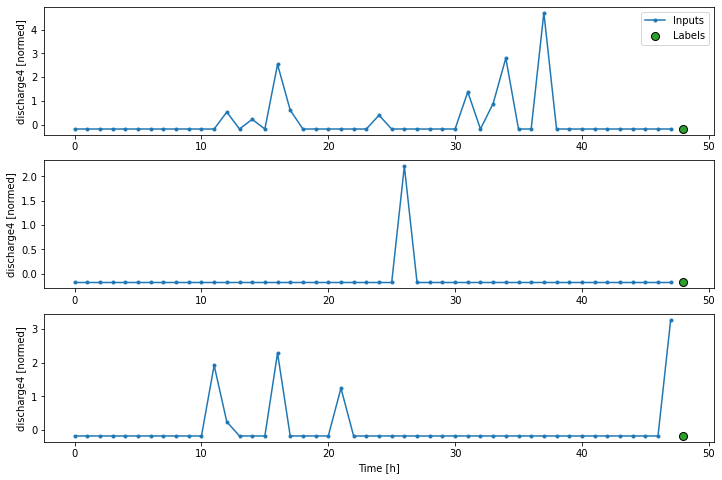

In [26]:
w2.plot()

In [27]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [28]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  #Get and cache an example batch of `inputs, labels` for plotting
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [29]:
w2.train.element_spec

(TensorSpec(shape=(None, 48, 8), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [30]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 48, 8)
Labels shape (batch, time, features): (32, 1, 1)


In [31]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['discharge4'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['discharge4']

In [32]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [33]:
baseline = Baseline(label_index=column_indices['discharge4'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

52/52 [==============================] - 0s 1ms/step - loss: 1.9504 - mean_absolute_error: 0.3576


In [34]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['discharge4'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['discharge4']

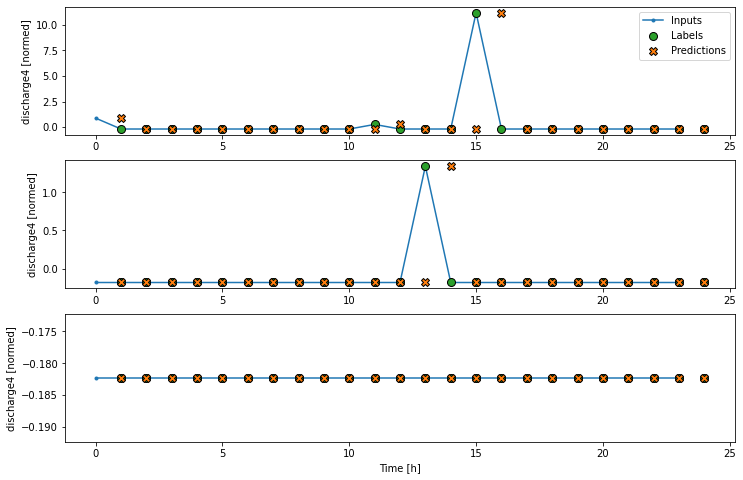

In [35]:
wide_window.plot(baseline)

In [36]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [37]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [38]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
180/180 [==============================] - 1s 5ms/step - loss: 2.5044 - mean_absolute_error: 0.6375 - val_loss: 1.8349 - val_mean_absolute_error: 0.5910
Epoch 2/20
180/180 [==============================] - 0s 1ms/step - loss: 2.1227 - mean_absolute_error: 0.5810 - val_loss: 1.5999 - val_mean_absolute_error: 0.5523
Epoch 3/20
180/180 [==============================] - 0s 1ms/step - loss: 1.9215 - mean_absolute_error: 0.5483 - val_loss: 1.4178 - val_mean_absolute_error: 0.5164
Epoch 4/20
180/180 [==============================] - 0s 1ms/step - loss: 1.7408 - mean_absolute_error: 0.5229 - val_loss: 1.2821 - val_mean_absolute_error: 0.4873
Epoch 5/20
180/180 [==============================] - 0s 1ms/step - loss: 1.5940 - mean_absolute_error: 0.4859 - val_loss: 1.1853 - val_mean_absolute_error: 0.4609
Epoch 6/20
180/180 [==============================] - 0s 1ms/step - loss: 1.5061 - mean_absolute_error: 0.4652 - val_loss: 1.1100 - val_mean_absolute_error: 0.4381
Epoch 7/20
180/1

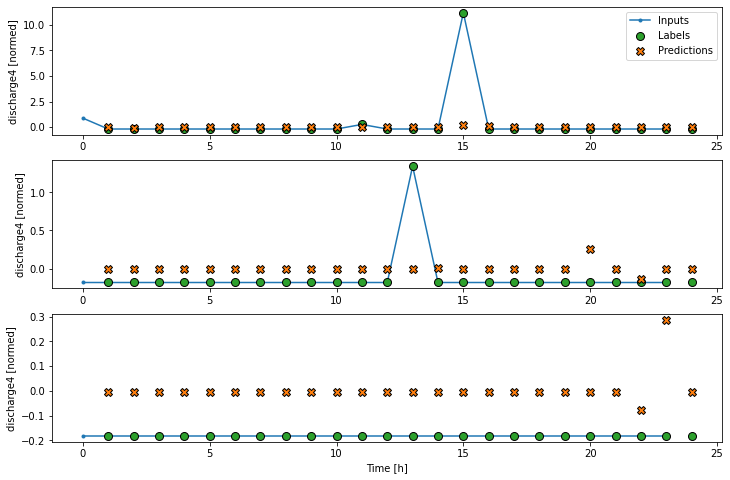

In [39]:
wide_window.plot(linear)

In [40]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
180/180 [==============================] - 1s 2ms/step - loss: 0.8916 - mean_absolute_error: 0.3214 - val_loss: 0.9751 - val_mean_absolute_error: 0.3661
Epoch 2/20
180/180 [==============================] - 0s 1ms/step - loss: 0.8797 - mean_absolute_error: 0.3328 - val_loss: 1.0087 - val_mean_absolute_error: 0.3919
Epoch 3/20
180/180 [==============================] - 0s 1ms/step - loss: 0.8746 - mean_absolute_error: 0.3298 - val_loss: 0.9664 - val_mean_absolute_error: 0.3640
Epoch 4/20
180/180 [==============================] - 0s 1ms/step - loss: 0.8792 - mean_absolute_error: 0.3296 - val_loss: 0.9690 - val_mean_absolute_error: 0.3583
Epoch 5/20
52/52 [==============================] - 0s 687us/step - loss: 0.9698 - mean_absolute_error: 0.3670


In [41]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['discharge4'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['discharge4']

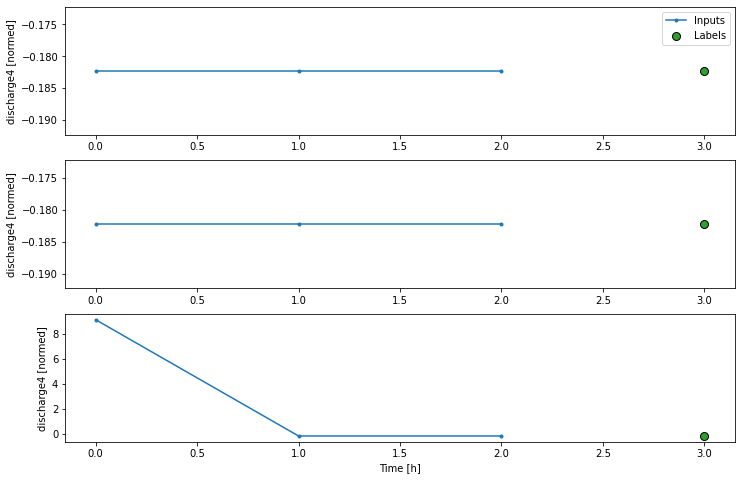

In [42]:
conv_window.plot()

In [43]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [44]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

52/52 [==============================] - 0s 687us/step - loss: 0.9762 - mean_absolute_error: 0.3847


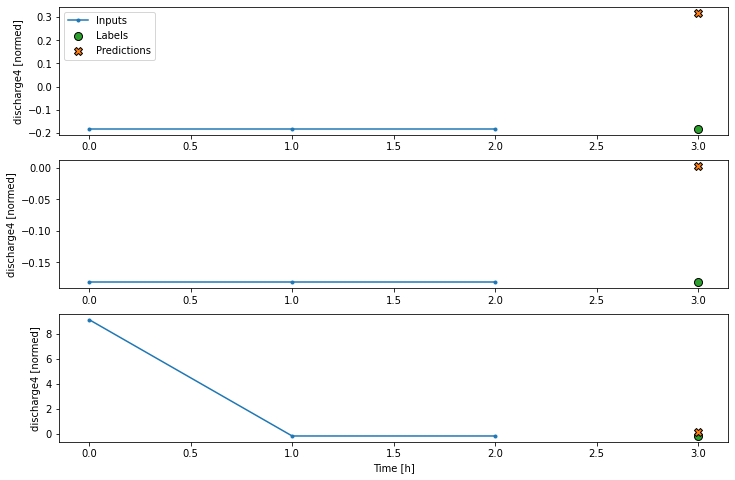

In [45]:
conv_window.plot(multi_step_dense)

In [46]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 8)
Labels shape (batch, time, features): (32, 24, 8)


In [47]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [48]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

51/51 [==============================] - 0s 601us/step - loss: 1.6149 - mean_absolute_error: 0.1961


In [49]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [50]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

52/52 [==============================] - 0s 687us/step - loss: 0.8386 - mean_absolute_error: 0.1974
